## Objective:

    * Using the hsitorical data of the policies with claims lodged, predict the Incurred Claim amount for
      future claims
        
## Data Scope and Assumptions:

    * As it was clear fro the EDA that years 2010, 2011, and 2012 had a very less contribution of data, those years
      are not considered for the analysis
    
    * Each record represents a unique policy
    
    * Redundant features are removed from the data
    
    * Many of the policy features are extremely skewed
    
## Techniques used and Results Obtained:

    * For modelling purpose, policies with at least one claim lodged in the past is only considered
    * Policies with 0 claims is not considered as this may create a bias while modelling
    * Techniques used:
        1. Linear Regression:
            i.  Target Variable: Incurred Claim
            ii. Predictor Variables: Policy Features
            iii.Results: Owing to the data availability and quality, the R Squared Value obtained was 0.016,
                which is extremely low. With additional data and better features, the results can be improved
            
        2. Gradient Boosting Regression:
            i. Target Variable: Incurred Claim
            ii. Predictor Variables: Policy Features
            iii.Results: Owing to the data availability and quality, the RMSE Value obtained is very high

## Next Steps:

    * Improve the model by tuning the hyperparameters
    * Perform more feature engineering to get better and isightful features which can be incorporated in the Model
    * Trying different algorithms which could accommodate the skewness and provide better results
            

In [5]:
# Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from matplotlib.pyplot import pie, axis, show
from sklearn import preprocessing

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier


import statsmodels.formula.api as smf 

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
#import xgboost as xgb
#import lightgbm as lgb

In [7]:
# Import the csv file

policy_data = pd.read_csv('policy_data.csv')

In [8]:
# Filter the data for 2013 and 2014

policy_data_filtered = policy_data[policy_data['Underwriting_Year'] > 2012]

policy_data_filtered.shape

(215313, 67)

In [10]:
# Check for duplicates and drop duplicate records

# Drop the first column as it contains the rownumber, because of which dulictons will be ignored
policy_data_wo_dup = policy_data_filtered#.drop('Unnamed: 0',axis=1)

# Remove duplicates at Oerall Level
policy_data_wo_dup.drop_duplicates()

# Get the number of Records and Features in the New Data
policy_data_wo_dup.shape

(215313, 67)

In [11]:
# Drop the redundant features from the raw data

policy_data_wo_dup_1 = policy_data_wo_dup.drop( ['Public_Liability_Limit_1000000',
                   'Public_Liability_Limit_1000000.1','Public_Liability_Limit_2000000','Public_Liability_Limit_5000000',
                    'Public_Liability_Limit_5000000.1','Public_Liability_Limit_1000000.2','Public_Liability_Limit_1000000.3',
                    'Employers_Liability_Limit_1000','Professional_Indemnity_Limit_5','Professional_Indemnity_Limit_5.1',
                    'Professional_Indemnity_Limit_1','Professional_Indemnity_Limit_1.1','Professional_Indemnity_Limit_2',
                    'Professional_Indemnity_Limit_2.1','Professional_Indemnity_Limit_5.2','Professional_Indemnity_Limit_5.3',
                    'Professional_Indemnity_Limit_1.2','Professional_Indemnity_Limit_1.3','Professional_Indemnity_Limit_2.2',
                    'Professional_Indemnity_Limit_2.3','Public_Liability_Limit_5000000.2', 'Public_Liability_Limit_5000000.3' 
                  ], axis = 1)

In [12]:
# Check and Remove Duplicate Records

policy_data_wo_dup_2 = policy_data_wo_dup_1.drop_duplicates()

policy_data_wo_dup_2.shape

(215097, 45)

In [14]:
# Drop the irrelevant Fields - CancellationEffectiveDate

policy_data_2 = policy_data_wo_dup_2.drop(['CancellationEffectiveDate'], axis=1)

# Check whether the field is dropped

policy_data_2.shape

(215097, 44)

In [15]:
# Perform OneHot Encoding for all the categorical/string variables

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Source_System','Product',"Trade_1_Category","Transaction_Type",'Risk_Postcode2']
for col in cat_vars:
    policy_data_2[col]=labelEnc.fit_transform(policy_data_2[col])
    

policy_data_2.head()

Source_System  Product  Underwriting_Year   Effective_Date  \
0              1        2               2014  19/09/2014 1:00   
1              1        2               2014   8/10/2014 1:00   
2              1        2               2014  18/09/2014 1:00   
3              1        2               2014   3/10/2014 1:00   
4              1        2               2014  20/09/2014 1:00   

       Expiry_Date  Transaction_Type  Public_Liability_Limit  \
0  18/09/2015 1:00                 0                 1000000   
1   7/10/2015 1:00                 0                 5000000   
2  17/09/2015 1:00                 0                 5000000   
3   2/10/2015 1:00                 0                 2000000   
4  19/09/2015 1:00                 0                 1000000   

   Employers_Liability_Limit  Tools_Sum_Insured  Professional_Indemnity_Limit  \
0                          0                0.0                         50000   
1                          0                0.0                             0   
2                   10000000             4000.0                             0   
3                          0             2000.0                             0   
4                          0                0.0                       1000000   

            ...             Hired_in_Plan_Sum_Insured_Ind  \
0           ...                                         0   
1           ...                                         0   
2           ...                                         0   
3           ...                                         0   
4           ...                                         0   

   Own_Plant_Sum_Insured_Ind             Location  \
0                          0             BRIGHTON   
1                          0              BRISTOL   
2                          0          NORTHAMPTON   
3                          0            CAMBRIDGE   
4                          0  NEWCASTLE UPON TYNE   

  Professional_Indemnity_Limit_g Risk_Postcode2  TotalEmployees  Claim_Count  \
0                              1            815               1            0   
1                              0            918               1            0   
2                              0           7462               8            0   
3                              0           1685              10            0   
4                              1           7270               1            0   

   Claim_Incurred Capped_Incurred_(£50k)  Capped_Incurred_(£100k)  
0             0.0                    0.0                      0.0  
1             0.0                    0.0                      0.0  
2             0.0                    0.0                      0.0  
3             0.0                    0.0                      0.0  
4             0.0                    0.0                      0.0  

[5 rows x 44 columns]

In [ ]:
# Check the distribution of all features in the dataset

print ('Quick plot after normalization of the different variables-------------------------------')
sns.pairplot(policy_data_2)
plt.show()

Quick plot after normalization of the different variables-------------------------------


ValueError: max must be larger than min in range parameter.

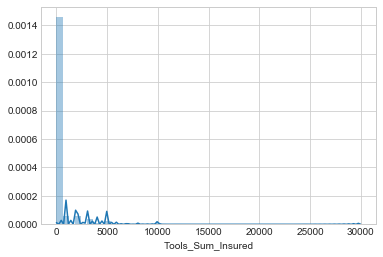

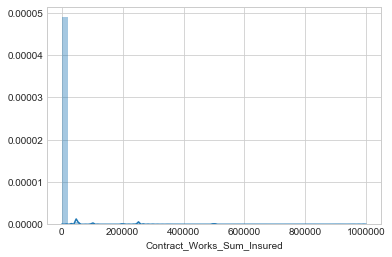

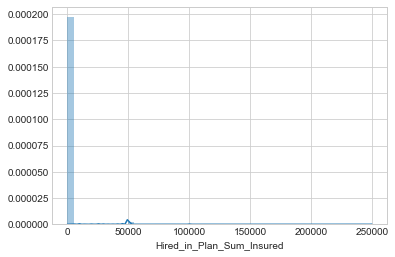

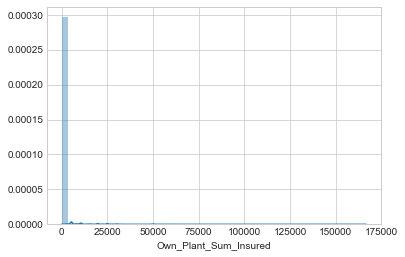

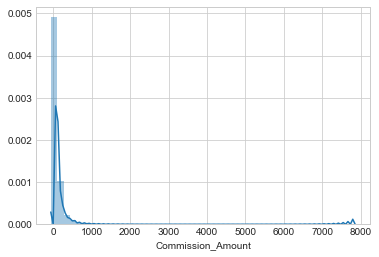

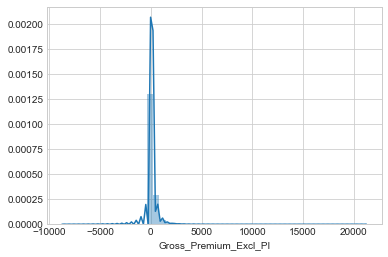

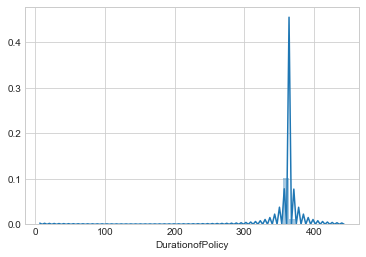

In [12]:
# Check for the distribution of continuous variables - Normal Distribution of features will ensure better results

sns.distplot(policy_data_2.Tools_Sum_Insured)
plt.show()

sns.distplot(policy_data_2.Contract_Works_Sum_Insured)
plt.show()

sns.distplot(policy_data_2.Hired_in_Plan_Sum_Insured)
plt.show()

sns.distplot(policy_data_2.Own_Plant_Sum_Insured)
plt.show()

sns.distplot(policy_data_2.Commission_Amount)
plt.show()

sns.distplot(policy_data_2.Gross_Premium_Excl_PI)
plt.show()

sns.distplot(policy_data_2.DurationofPolicy)
plt.show()

** None of the above variables are Normally Distributed**

In [16]:
# Scale all the numeric variables to make mean = 0 and stddev = 1

policy_data_2['Tools_Sum_Insured_Sc'] = preprocessing.scale(policy_data_2['Tools_Sum_Insured'])
policy_data_2['Contract_Works_Sum_Insured_Sc'] = preprocessing.scale(policy_data_2['Contract_Works_Sum_Insured'])
policy_data_2['Hired_in_Plan_Sum_Insured_Sc'] = preprocessing.scale(policy_data_2['Hired_in_Plan_Sum_Insured'])
policy_data_2['Own_Plant_Sum_Insured_Sc'] = preprocessing.scale(policy_data_2['Own_Plant_Sum_Insured'])
policy_data_2['Commission_Amount_Sc'] = preprocessing.scale(policy_data_2['Commission_Amount'])
policy_data_2['Gross_Premium_Excl_PI_Sc'] = preprocessing.scale(policy_data_2['Gross_Premium_Excl_PI'])
policy_data_2['DurationofPolicy_Sc'] = preprocessing.scale(policy_data_2['DurationofPolicy'])

C:\Users\803685\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


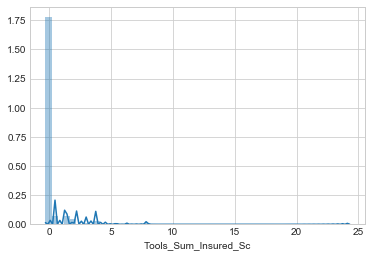

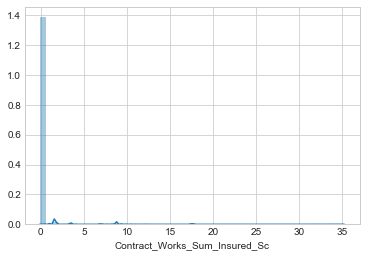

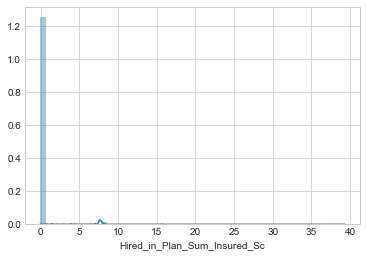

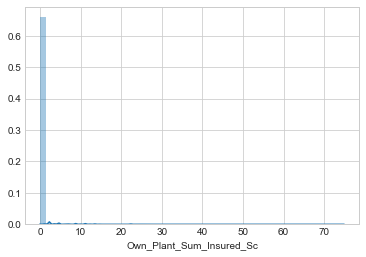

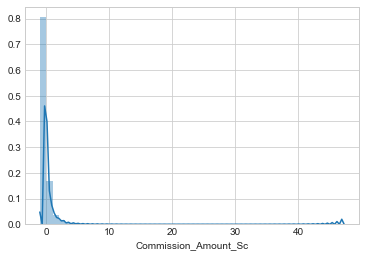

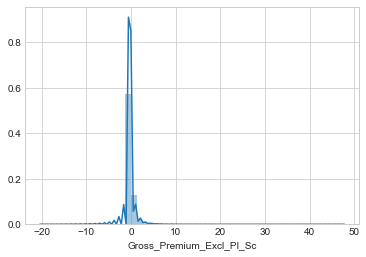

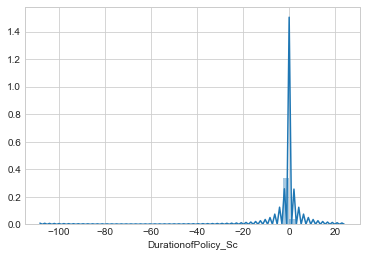

In [17]:
# Check the distribution of features after scaling

sns.distplot(policy_data_2.Tools_Sum_Insured_Sc)
plt.show()

sns.distplot(policy_data_2.Contract_Works_Sum_Insured_Sc)
plt.show()

sns.distplot(policy_data_2.Hired_in_Plan_Sum_Insured_Sc)
plt.show()

sns.distplot(policy_data_2.Own_Plant_Sum_Insured_Sc)
plt.show()

sns.distplot(policy_data_2.Commission_Amount_Sc)
plt.show()

sns.distplot(policy_data_2.Gross_Premium_Excl_PI_Sc)
plt.show()

sns.distplot(policy_data_2.DurationofPolicy_Sc)
plt.show()

## Model Building

** For modelling, consider only policices with at least one claim associated with it **

In [18]:
# Filter data for policies with at least 1 claim

policy_data_2_with_claims = policy_data_2[policy_data_2['Claim_Count'] > 0]

policy_data_2_with_claims.shape

(2961, 51)

In [21]:
policy_data_2_with_claims.columns

Index(['Source_System', 'Product', 'Underwriting_Year', 'Effective_Date',
       'Expiry_Date', 'Transaction_Type', 'Public_Liability_Limit',
       'Employers_Liability_Limit', 'Tools_Sum_Insured',
       'Professional_Indemnity_Limit', 'Contract_Works_Sum_Insured',
       'Hired_in_Plan_Sum_Insured', 'Own_Plant_Sum_Insured', 'Trade_1',
       'Trade_2', 'Manual_EE', 'Clerical_EE', 'Subcontractor_EE', 'Match_Type',
       'Trade_1_Category', 'Trade_2_Category', 'Trade_1_Risk_Level',
       'Trade_2_Risk_Level', 'Effective_Date2', 'Total_Gross_Premium_excl_IPT',
       'Commission_Amount', 'Net_Premium_to_UW', 'Policy_Count',
       'Gross_Premium_Excl_PI', 'Gross_PI_Premium', 'DurationofPolicy',
       'CombinedTradeRiskLevel', 'Tools_Sum_Insured_Ind',
       'Contract_Works_Sum_Insured_Ind', 'Hired_in_Plan_Sum_Insured_Ind',
       'Own_Plant_Sum_Insured_Ind', 'Location',
       'Professional_Indemnity_Limit_g', 'Risk_Postcode2', 'TotalEmployees',
       'Claim_Count', 'Claim_Incurred

In [22]:
# Drop the columns which are not reuired for modelling purpose

policy_data_3 = policy_data_2_with_claims.drop(['Underwriting_Year','Effective_Date','Expiry_Date' ,'Location', 'Trade_1','Trade_2',
                                    'Match_Type',
                                    'Claim_Count','TotalEmployees','Capped_Incurred_(£50k)', 'Trade_2_Category',
                                    'Trade_2_Risk_Level','Effective_Date2','Total_Gross_Premium_excl_IPT','Commission_Amount',
                                    'Net_Premium_to_UW','Policy_Count',
                                    'Tools_Sum_Insured_Ind','Contract_Works_Sum_Insured_Ind',
                                    'Hired_in_Plan_Sum_Insured_Ind','Own_Plant_Sum_Insured_Ind','Professional_Indemnity_Limit_g',
                                    'TotalEmployees',
                                    'Capped_Incurred_(£100k)', 'Gross_PI_Premium','Source_System',
                                    #'Risk_Postcode2',
                                   'Tools_Sum_Insured','Contract_Works_Sum_Insured','Hired_in_Plan_Sum_Insured',
                                   'Own_Plant_Sum_Insured',
                                   #'Manual_EE','Clerical_EE','Subcontractor_EE',
                                    'Commission_Amount',
                                    'Gross_Premium_Excl_PI','DurationofPolicy'
                                   ], axis = 1)

policy_data_3.head()

Product  Transaction_Type  Public_Liability_Limit  \
100        2                 0                 2000000   
127        2                 0                 5000000   
167        2                 0                10000000   
191        2                 0                 1000000   
230        2                 0                 5000000   

     Employers_Liability_Limit  Professional_Indemnity_Limit  Manual_EE  \
100                   10000000                         50000          2   
127                          0                             0          1   
167                   10000000                             0          2   
191                          0                             0          1   
230                          0                             0          1   

     Clerical_EE  Subcontractor_EE  Trade_1_Category  Trade_1_Risk_Level  \
100            1                 0                 8                   4   
127            0                 0                 6                   4   
167            0                 0                 7                   3   
191            0                 0                 7                   2   
230            0                 0                 6                   4   

     CombinedTradeRiskLevel  Risk_Postcode2  Claim_Incurred  \
100                       4            7686        16000.00   
127                       4            8716         1676.62   
167                       3             847           45.00   
191                       2            3748          417.60   
230                       4           10263         1072.00   

     Tools_Sum_Insured_Sc  Contract_Works_Sum_Insured_Sc  \
100             -0.297646                      -0.105433   
127              2.162738                      -0.105433   
167             -0.297646                      -0.105433   
191             -0.297646                      -0.105433   
230              1.342610                      -0.105433   

     Hired_in_Plan_Sum_Insured_Sc  Own_Plant_Sum_Insured_Sc  \
100                     -0.107503                 -0.079561   
127                     -0.107503                 -0.079561   
167                     -0.107503                 -0.079561   
191                     -0.107503                 -0.079561   
230                     -0.107503                 -0.079561   

     Commission_Amount_Sc  Gross_Premium_Excl_PI_Sc  DurationofPolicy_Sc  
100              0.599617                  0.425734            -0.053172  
127             -0.190212                 -0.078120            -0.053172  
167              0.151317                  0.266437            -0.053172  
191             -0.483996                 -0.374435            -0.053172  
230             -0.262164                 -0.150687            -0.053172

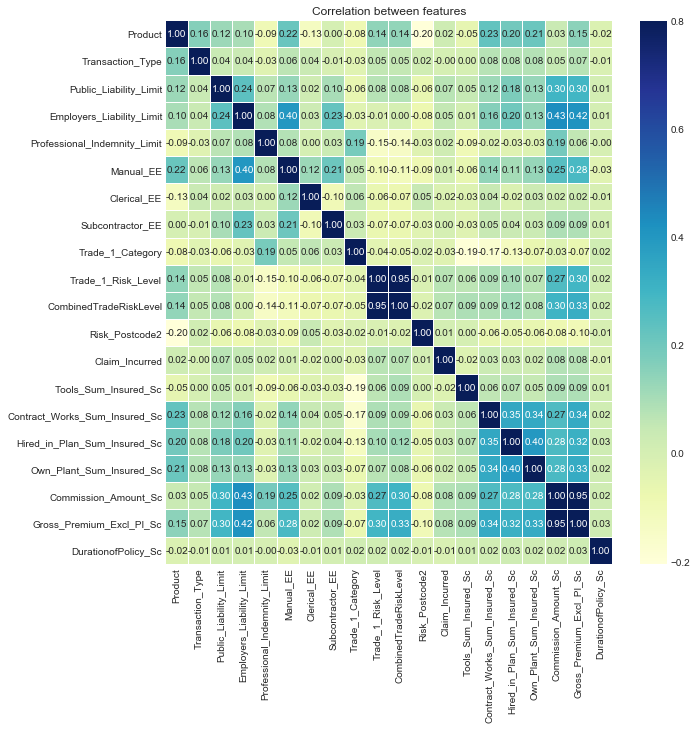

In [23]:
# Plot the correlation Matrix

corr=policy_data_3.corr()
plt.figure(figsize=(10, 10))

#sns.heatmap(corr, vmax=.8, linewidths=0.01,
           # square=True,annot=True,cmap='YlGnBu',linecolor="white")

graph = sns.heatmap(corr,vmax=.8, linewidths=0.01,annot=True, fmt = ".2f", cmap = "YlGnBu")
plt.title('Correlation between features');

In [24]:
# Check the correlation of each feature with the target feature

policy_data_3.corr()["Claim_Incurred"]

Product                          0.023154
Transaction_Type                -0.000675
Public_Liability_Limit           0.069961
Employers_Liability_Limit        0.052054
Professional_Indemnity_Limit     0.022707
Manual_EE                        0.011002
Clerical_EE                     -0.018698
Subcontractor_EE                 0.002981
Trade_1_Category                -0.029225
Trade_1_Risk_Level               0.073002
CombinedTradeRiskLevel           0.070880
Risk_Postcode2                   0.009801
Claim_Incurred                   1.000000
Tools_Sum_Insured_Sc            -0.024563
Contract_Works_Sum_Insured_Sc    0.032997
Hired_in_Plan_Sum_Insured_Sc     0.030114
Own_Plant_Sum_Insured_Sc         0.019209
Commission_Amount_Sc             0.081042
Gross_Premium_Excl_PI_Sc         0.076836
DurationofPolicy_Sc             -0.010729
Name: Claim_Incurred, dtype: float64

In [25]:
# Since Gross_Prem and Commission_Amount has a high correlation and also 
# since Gross Prem has a higher correlation wit the target variable, consider Gross Prem for Model Bulding Purpose

policy_data_4 = policy_data_3.drop(['Commission_Amount_Sc','CombinedTradeRiskLevel'], axis = 1)

policy_data_4.head()

Product  Transaction_Type  Public_Liability_Limit  \
100        2                 0                 2000000   
127        2                 0                 5000000   
167        2                 0                10000000   
191        2                 0                 1000000   
230        2                 0                 5000000   

     Employers_Liability_Limit  Professional_Indemnity_Limit  Manual_EE  \
100                   10000000                         50000          2   
127                          0                             0          1   
167                   10000000                             0          2   
191                          0                             0          1   
230                          0                             0          1   

     Clerical_EE  Subcontractor_EE  Trade_1_Category  Trade_1_Risk_Level  \
100            1                 0                 8                   4   
127            0                 0                 6                   4   
167            0                 0                 7                   3   
191            0                 0                 7                   2   
230            0                 0                 6                   4   

     Risk_Postcode2  Claim_Incurred  Tools_Sum_Insured_Sc  \
100            7686        16000.00             -0.297646   
127            8716         1676.62              2.162738   
167             847           45.00             -0.297646   
191            3748          417.60             -0.297646   
230           10263         1072.00              1.342610   

     Contract_Works_Sum_Insured_Sc  Hired_in_Plan_Sum_Insured_Sc  \
100                      -0.105433                     -0.107503   
127                      -0.105433                     -0.107503   
167                      -0.105433                     -0.107503   
191                      -0.105433                     -0.107503   
230                      -0.105433                     -0.107503   

     Own_Plant_Sum_Insured_Sc  Gross_Premium_Excl_PI_Sc  DurationofPolicy_Sc  
100                 -0.079561                  0.425734            -0.053172  
127                 -0.079561                 -0.078120            -0.053172  
167                 -0.079561                  0.266437            -0.053172  
191                 -0.079561                 -0.374435            -0.053172  
230                 -0.079561                 -0.150687            -0.053172

In [ ]:
** Splitting of data to Train and Test samples **

In [26]:
X = policy_data_4[[
 'Product', 'Transaction_Type', 'Public_Liability_Limit',
       'Employers_Liability_Limit', 'Professional_Indemnity_Limit',
       'Manual_EE', 'Clerical_EE', 'Subcontractor_EE', 'Trade_1_Category',
       'Trade_1_Risk_Level', 'Risk_Postcode2',
        'Tools_Sum_Insured_Sc', 'Contract_Works_Sum_Insured_Sc',
       'Hired_in_Plan_Sum_Insured_Sc', 'Own_Plant_Sum_Insured_Sc',
       'Gross_Premium_Excl_PI_Sc', 'DurationofPolicy_Sc']]
y = policy_data_4[['Claim_Incurred']]

In [27]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(policy_data_4,test_size=0.2,random_state=27)
print (train.shape, test.shape)

(2368, 18) (593, 18)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2072, 17) (889, 17) (2072, 1) (889, 1)


In [29]:
# Segregating the Train/Test data x and y
xtrain = policy_data_4[[ 'Product', 'Transaction_Type', 'Public_Liability_Limit',
       'Employers_Liability_Limit', 'Professional_Indemnity_Limit',
       'Manual_EE', 'Clerical_EE', 'Subcontractor_EE', 'Trade_1_Category',
       'Trade_1_Risk_Level', 'Risk_Postcode2',
        'Tools_Sum_Insured_Sc', 'Contract_Works_Sum_Insured_Sc',
       'Hired_in_Plan_Sum_Insured_Sc', 'Own_Plant_Sum_Insured_Sc',
       'Gross_Premium_Excl_PI_Sc', 'DurationofPolicy_Sc' ,'Product', 'Transaction_Type', 'Public_Liability_Limit',
       'Employers_Liability_Limit', 'Professional_Indemnity_Limit',
       'Manual_EE', 'Clerical_EE', 'Subcontractor_EE', 'Trade_1_Category',
       'Trade_1_Risk_Level', 'Risk_Postcode2',
        'Tools_Sum_Insured_Sc', 'Contract_Works_Sum_Insured_Sc',
       'Hired_in_Plan_Sum_Insured_Sc', 'Own_Plant_Sum_Insured_Sc',
       'Gross_Premium_Excl_PI_Sc', 'DurationofPolicy_Sc']]
ytrain = policy_data_4[['Claim_Incurred']]
xtest = test[[ 'Product', 'Transaction_Type', 'Public_Liability_Limit',
       'Employers_Liability_Limit', 'Professional_Indemnity_Limit',
       'Manual_EE', 'Clerical_EE', 'Subcontractor_EE', 'Trade_1_Category',
       'Trade_1_Risk_Level', 'Risk_Postcode2',
        'Tools_Sum_Insured_Sc', 'Contract_Works_Sum_Insured_Sc',
       'Hired_in_Plan_Sum_Insured_Sc', 'Own_Plant_Sum_Insured_Sc',
       'Gross_Premium_Excl_PI_Sc', 'DurationofPolicy_Sc' ,'Product', 'Transaction_Type', 'Public_Liability_Limit',
       'Employers_Liability_Limit', 'Professional_Indemnity_Limit',
       'Manual_EE', 'Clerical_EE', 'Subcontractor_EE', 'Trade_1_Category',
       'Trade_1_Risk_Level', 'Risk_Postcode2',
        'Tools_Sum_Insured_Sc', 'Contract_Works_Sum_Insured_Sc',
       'Hired_in_Plan_Sum_Insured_Sc', 'Own_Plant_Sum_Insured_Sc',
       'Gross_Premium_Excl_PI_Sc', 'DurationofPolicy_Sc']]
ytest = test[['Claim_Incurred']]

In [35]:
xtrain.shape

(2961, 34)

In [ ]:
** Model Execution - Linear Regression **

In [41]:
#Performing LInear Regression on the target and predictor variables
mod = smf.ols(formula= 'Claim_Incurred ~ Product+Transaction_Type+Public_Liability_Limit+Employers_Liability_Limit+Professional_Indemnity_Limit+Manual_EE+Clerical_EE+Subcontractor_EE+Trade_1_Category+Trade_1_Risk_Level+Risk_Postcode2 +Tools_Sum_Insured_Sc+Contract_Works_Sum_Insured_Sc+Hired_in_Plan_Sum_Insured_Sc+Own_Plant_Sum_Insured_Sc+Gross_Premium_Excl_PI_Sc+DurationofPolicy_Sc',
              data=policy_data_4)
mod = mod.fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:         Claim_Incurred   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.729
Date:                Tue, 24 Jul 2018   Prob (F-statistic):           0.000164
Time:                        09:47:47   Log-Likelihood:                -36993.
No. Observations:                2961   AIC:                         7.402e+04
Df Residuals:                    2943   BIC:                         7.413e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
** Model Execution - Gradient Boosting Regression Method and Using Cross Validation for the Model Validation **

In [30]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=27).get_n_splits(xtrain.values)
    rmse= np.sqrt(-cross_val_score(model, xtrain.values, ytrain, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [36]:
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [37]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\803685\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\803685\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\803685\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\803685\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A colu

Gradient Boosting score: 55035.0906 (34713.7777)

